### What is Decision Tree

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

- A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

- We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

    - At the beginning, the whole training set is considered as the root.
    - Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
    - Records are distributed recursively on the basis of attribute values.
    - Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

- What is Classification and Regression Trees (CART)?
    - Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

    - The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.
    
    
- Terminologies used - In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

    - Root Node: It represents the entire population or sample. This further gets divided into two or more homogeneous sets.
    - Splitting: It is a process of dividing a node into two or more sub-nodes.
    - Decision Node: When a sub-node splits into further sub-nodes, then it is called a decision node.
    - Leaf/Terminal Node: Nodes that do not split are called Leaf or Terminal nodes.
    - Pruning: When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.
    - Branch/Sub-Tree: A sub-section of an entire tree is called a branch or sub-tree.
    - Parent and Child Node: A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.
    
    
- How Decision Tree algorithm works? - The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. It works as below:

    - For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

    - For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

    - This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.
        
        
- How are attributes selected? - The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

    - Information gain
    - Gini index
    
While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

- Information Gain - Entropy
    - By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

    - Entropy Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

    - The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.
    
- Gini Index
    - Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points. Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure. It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.


    - Steps to Calculate Gini for a split:
     - Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).
     - Calculate Gini for split using weighted Gini score of each node of that split.
     - In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected  as a splitting attribute. 
     - In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. 
     - The attribute with minimum Gini index is chosen as the splitting attribute.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
X_train=pd.read_csv("X_train.csv",index_col=0)
X_train.head()

,intl_plan,number_customer_service_calls,number_vmail_messages,total_day_charge,total_day_minutes,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_charge,total_night_minutes
0,-0.32324,-0.436676,-0.572549,0.399549,0.399172,0.751448,0.751063,-0.177160,1.178988,1.172792,-0.522416,-0.520392
1,-0.32324,0.328885,1.642284,0.924592,0.924322,1.722281,1.720473,-0.584236,-1.222308,-1.217542,-0.460838,-0.461013
2,-0.32324,-1.202236,-0.572549,0.530537,0.530923,1.023840,1.024081,1.044069,0.924102,0.919272,1.580036,1.579653
3,-0.32324,1.094445,2.232906,-0.309968,-0.309689,-1.066829,-1.067073,-0.584236,1.031422,1.027924,2.877575,2.878078
4,-0.32324,-1.202236,1.716112,0.709554,0.709066,-1.313611,-1.314372,0.636993,-0.310084,-0.312113,-1.613229,-1.612969


In [3]:
X_test=pd.read_csv("X_test.csv",index_col=0)
X_test.head()

,intl_plan,number_customer_service_calls,number_vmail_messages,total_day_charge,total_day_minutes,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_charge,total_night_minutes
1501,-0.32324,-1.202236,-0.572549,1.709428,1.709265,-1.835114,-1.834687,-0.991312,0.883856,0.883055,-0.293698,-0.294751
2586,-0.32324,-0.436676,-0.572549,-0.300144,-0.300410,0.106553,0.106110,-0.991312,0.414329,0.412231,-0.113362,-0.112655
2653,-0.32324,-0.436676,1.642284,-2.202743,-2.202457,1.077387,1.077497,0.229917,0.776536,0.774403,0.506818,0.504889
1055,-0.32324,-0.436676,-0.572549,-0.040352,-0.040618,-1.071485,-1.071030,-0.991312,-0.632046,-0.638067,-1.243760,-1.242839
705,-0.32324,-0.436676,-0.572549,-2.178729,-2.178334,0.602447,0.600706,0.229917,-0.632046,-0.638067,-0.623580,-0.623316


In [4]:
y_train=pd.read_csv("y_train.csv",index_col=0)
y_train.head()

,churned
0,0
1,0
2,0
3,0
4,0


In [5]:
y_test=pd.read_csv("y_test.csv",index_col=0)
y_test.head()

,churned
1501,0
2586,0
2653,0
1055,0
705,0


### Build the base Logit regression model with default parameters

##### Create the model

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='gini', #function to measure the quality of a split
                            max_depth =5, #maximum depth of the tree  
                            max_features = 3, #number of features to consider when looking for the best split
                            min_samples_leaf = 1, #minimum number of samples required to be at a leaf node21qaz
                            random_state = 0 #controls the randomness of the estimator
                           )

dt1

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=0)

##### Fit or train the model

In [7]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=0)

##### Make predictions on test data

In [8]:
y_pred_dt1 = dt1.predict(X_test)
len(y_pred_dt1)

1250

### Model evaluation

##### Confusion Matrix

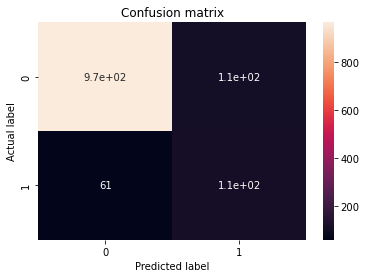

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve, auc, roc_auc_score

cm1 = confusion_matrix(y_test,y_pred_dt1)
sns.heatmap(cm1, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

##### Classification metrics

In [10]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

dt1_acc = accuracy_score(y_test,y_pred_dt1)
print("Base DT-Accuracy:", dt1_acc)
dt1_rec = recall_score(y_test,y_pred_dt1)
print("Base DT-Recall score:",dt1_rec)
dt1_f1 = f1_score(y_test,y_pred_dt1)
print("Base DT-F1 score:",dt1_f1)
dt1_ps = precision_score(y_test,y_pred_dt1)
print("Base DT-Precision score:",dt1_ps)

Base DT-Accuracy: 0.864
Base DT-Recall score: 0.6494252873563219
Base DT-F1 score: 0.5707070707070707
Base DT-Precision score: 0.509009009009009


##### ROC-AUC Curve

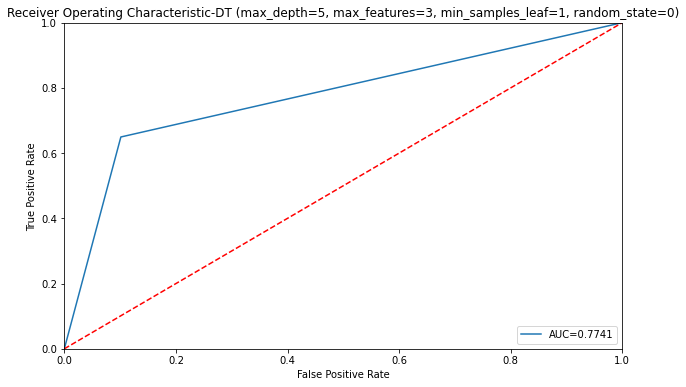

In [11]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test,y_pred_dt1)
auc = round(roc_auc_score(y_test,y_pred_dt1),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-DT (max_depth=5, max_features=3, min_samples_leaf=1, random_state=0)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

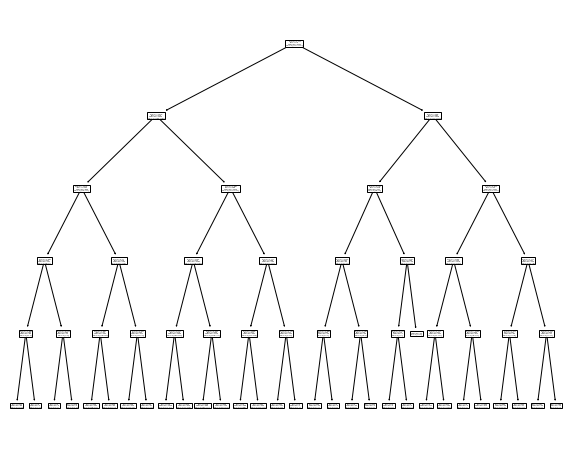

In [12]:
#plot the tree
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(dt1)
plt.show()

### Hyper parameter tuning

In [13]:
#grid search CV
from sklearn.model_selection import GridSearchCV

param_grid_dt ={'criterion':['gini','entropy'],#Number of neighbors
                 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],#Weight function used in prediction
                 'min_samples_leaf': [1, 2, 3]
                }

In [14]:
gs_dt = GridSearchCV(estimator=dt1,#estimator object
                  param_grid=param_grid_dt,#tuning parameters
                  cv=10, #integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_dt

GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=5, max_features=3,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [15]:
gs_dt.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=5, max_features=3,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [16]:
df_dt = pd.DataFrame(gs_dt.cv_results_)
df_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025892,0.007022,0.004050,0.004902,gini,4,1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.746894,0.765528,...,0.753195,0.744214,0.752374,0.753583,0.745122,0.742704,0.745985,0.753410,0.749698,0.004471
1,0.028241,0.006332,0.003125,0.006249,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.746894,0.765528,...,0.753195,0.744214,0.752374,0.753583,0.745122,0.742704,0.745985,0.753410,0.749681,0.004447
2,0.023751,0.007281,0.005666,0.007309,gini,4,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.746894,0.765528,...,0.753195,0.743869,0.752374,0.753583,0.745122,0.742704,0.745985,0.753410,0.749646,0.004491
3,0.028686,0.008549,0.006828,0.007205,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.788820,0.835404,...,0.831779,0.804318,0.834226,0.848558,0.794336,0.797962,0.792264,0.833707,0.816945,0.019331
4,0.027071,0.006987,0.006270,0.007679,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.835404,0.835404,...,0.831606,0.804145,0.834226,0.848558,0.794681,0.797962,0.792091,0.835089,0.820762,0.020108


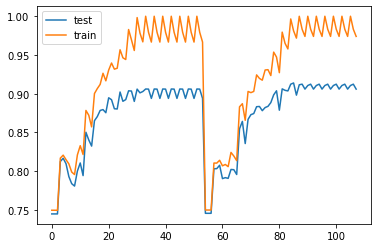

In [17]:
import  matplotlib.pyplot as plt
test_scores = gs_dt.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_dt.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_train_score'>

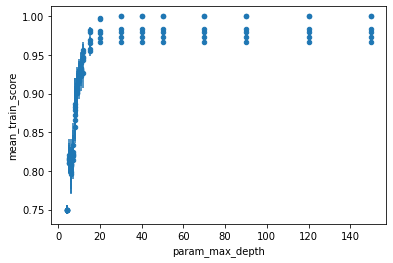

In [18]:
df_dt.plot.scatter("param_max_depth",'mean_train_score', yerr="std_train_score")

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

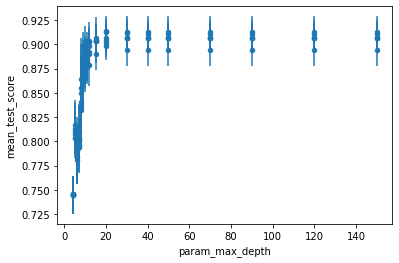

In [19]:
df_dt.plot.scatter("param_max_depth",'mean_test_score', yerr="std_test_score")

In [20]:
#mean cross-validated score of the best_estimator
gs_dt.best_score_ 

0.9139002926885812

In [21]:
#parameter setting that gave the best results on the hold out data.
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2}

In [22]:
gs_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=3,
                       min_samples_leaf=2, random_state=0)

### Refit the DT model with best parameters and make prediction on test data

In [23]:
dt2 = DecisionTreeClassifier(criterion='gini', #function to measure the quality of a split
                            max_depth =7, #maximum depth of the tree  
                            max_features = 3, #number of features to consider when looking for the best split
                            min_samples_leaf = 2, #minimum number of samples required to be at a leaf node21qaz
                            random_state = 0 #controls the randomness of the estimator
                           )


dt2.fit(X_train,y_train)
y_pred_dt2 =dt2.predict(X_test)
y_pred_dt2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

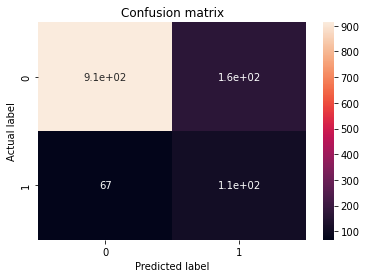

In [24]:
#create confusion matrix for the tuned model
import seaborn as sns
cm2 = confusion_matrix(y_test,y_pred_dt2)
sns.heatmap(cm2, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
#generate the classification metrics for the tuned model
dt2_acc = accuracy_score(y_test,y_pred_dt2)
print("Optimised DT: Accuracy", dt2_acc)
dt2_rec = recall_score(y_test,y_pred_dt2)
print("Optimised DT: Recall score",dt2_rec)
dt2_f1 = f1_score(y_test,y_pred_dt2)
print("Optimised DT: F1 score",dt2_f1)
dt2_ps = precision_score(y_test,y_pred_dt2)
print("Optimised DT: Precision score",dt2_ps)

Optimised DT: Accuracy 0.816
Optimised DT: Recall score 0.6149425287356322
Optimised DT: F1 score 0.481981981981982
Optimised DT: Precision score 0.3962962962962963


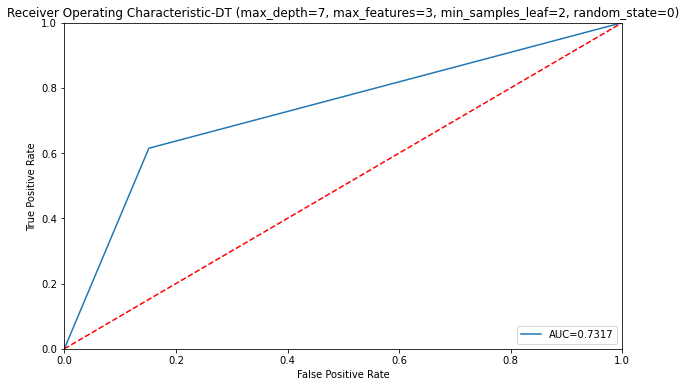

In [26]:
#generate the roc-auc curve for the tuned model
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test,y_pred_dt2)
auc = round(roc_auc_score(y_test,y_pred_dt2),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-DT (max_depth=7, max_features=3, min_samples_leaf=2, random_state=0)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion

Since the performance of tuned Decision tree model is less than or almost same as the base model, we cant say if Decision tree is the best model for our data.

Also for the decision tree accuracy is higher, recall score is less, Precision and F1 score are  higher in comparison with the Logit Regression classifier that we have built.